# Gender Recognition

Now that we have our differents datasets. We can start model searching. We have here a classification problem where we need to guess if the person talking is a male (0) or a female (1).

At first i will explore classic models with the same number of features : averageDataset, shortDataset, longDataset and shortLongDataset

In [21]:
#imports 
import os #file handling
import pandas as pd #data handling
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tqdm import tqdm #progress bar

#remove warnings
import warnings
warnings.filterwarnings('ignore')

#to save computer expensive variables
import pickle
import joblib

# Data exploration

In [22]:
#dataset imports
data = pd.read_csv('csv/averageDataset.csv')

In [23]:
data

,gender,mfcc_feature_1,mfcc_feature_2,mfcc_feature_3,mfcc_feature_4,mfcc_feature_5,mfcc_feature_6,mfcc_feature_7,mfcc_feature_8,mfcc_feature_9,...,delta2_feature_9,delta2_feature_10,delta2_feature_11,delta2_feature_12,delta2_feature_13,spectral_centroid,spectral_bandwidth,zero_crossing_rate,rms,spectral_rolloff
0,f,-261.329376,128.835617,-46.803890,34.379749,-33.132378,17.100742,-41.055466,6.149195,-24.271091,...,-0.056852,-0.018926,-0.062693,0.027363,0.043593,1893.759877,1844.429856,0.092675,0.043256,3829.661063
1,f,-360.135529,134.216812,-46.357185,30.270189,-7.256501,-12.362634,-17.299755,-3.161893,-3.762040,...,-0.004211,-0.015071,0.020860,-0.004695,-0.009887,1606.318761,1427.986776,0.097212,0.024582,2996.981693
2,f,-286.690765,156.186584,-41.509094,31.947565,-10.560344,-19.950380,-10.129725,-3.674345,-21.549614,...,0.013978,0.030787,-0.059828,-0.005424,0.034735,1471.610775,1401.235810,0.084658,0.045490,2883.150101
3,f,-299.983948,116.739891,-67.227562,46.645077,-34.803585,22.505936,-23.869476,5.576423,-3.070676,...,0.013208,-0.003000,0.003672,-0.002365,-0.026001,2289.833360,1745.082359,0.152470,0.024640,4266.686085
4,f,-294.242188,125.607529,-12.183384,27.121918,-21.402309,19.211809,-37.409805,4.842865,-13.371928,...,0.009805,0.025247,-0.045269,-0.004989,0.011084,2018.222078,1702.813100,0.141774,0.054737,3559.760325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,m,-126.744102,140.250870,-83.678558,20.616764,-25.494482,-4.816887,-35.334602,-17.951571,-33.505730,...,0.062034,-0.006147,0.045306,0.054977,0.044058,1698.533677,1340.849404,0.109503,0.149627,2963.592080
5989,m,-326.324402,147.580124,-11.765425,41.411476,-19.821945,2.909330,-24.478537,0.469839,-13.231600,...,-0.008805,0.026185,-0.039336,0.027020,0.067597,1338.227226,1375.068740,0.078851,0.046982,2431.839940
5990,m,-223.164627,160.098129,-12.670789,46.775211,-4.868187,9.461629,-7.377435,-2.501803,-9.316516,...,0.115600,0.000100,-0.021295,-0.024490,0.001369,1173.682304,1367.760517,0.056275,0.104549,2281.540749
5991,m,-412.057678,146.959000,-25.511068,43.604912,-15.084287,-5.401690,-13.202021,-3.270955,-15.048368,...,0.064946,0.037536,0.041298,0.012323,0.017743,1450.339631,1490.671229,0.079369,0.014216,2951.461640


In [24]:
# show features distribution, after using this function, you can see the distribution of each feature of a dataset
def showFeatureDistribution(data):
    for feature in data.columns[1:]:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature], kde=True)
        plt.title(f'{feature} distribution')
        plt.show()

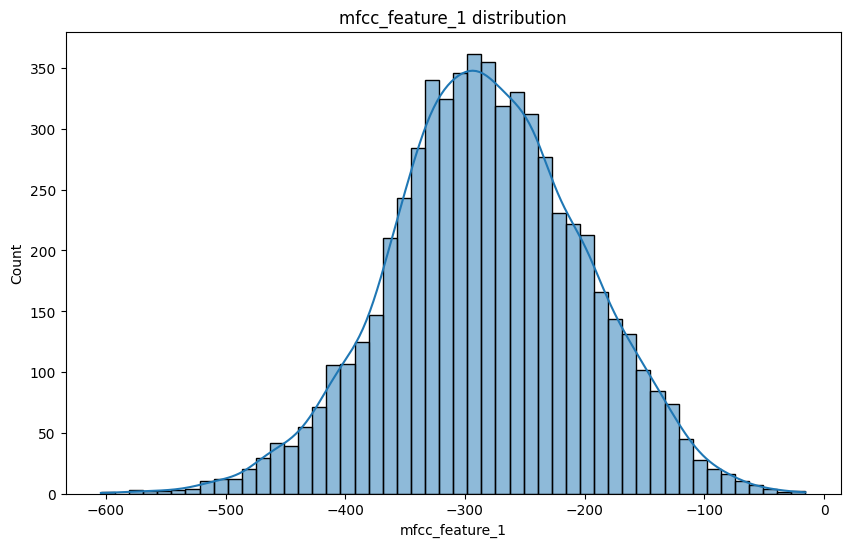

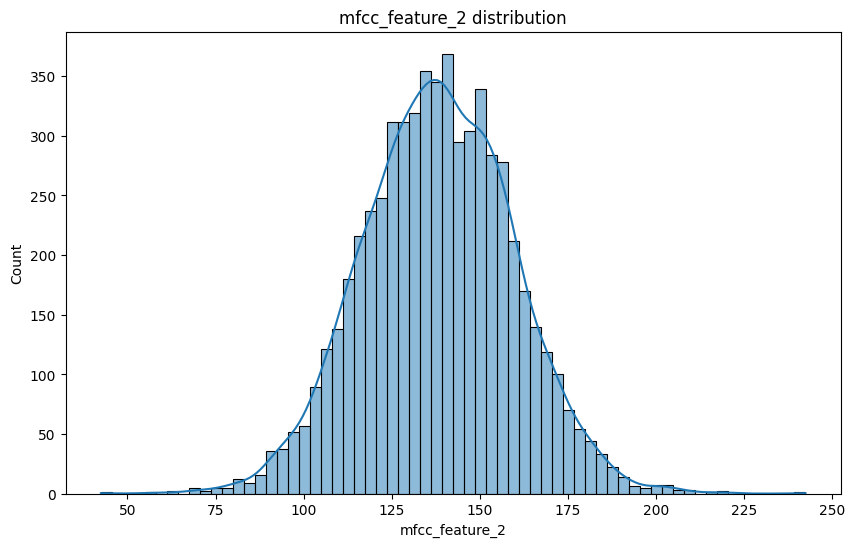

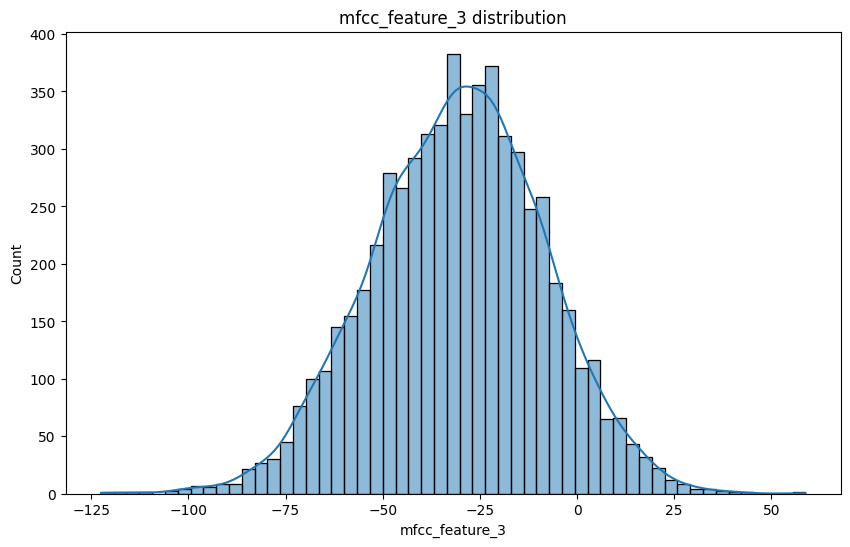

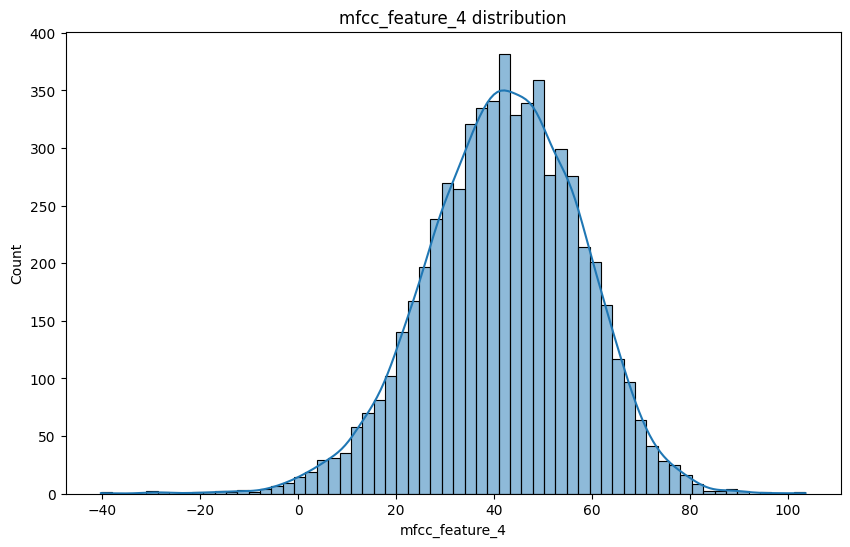

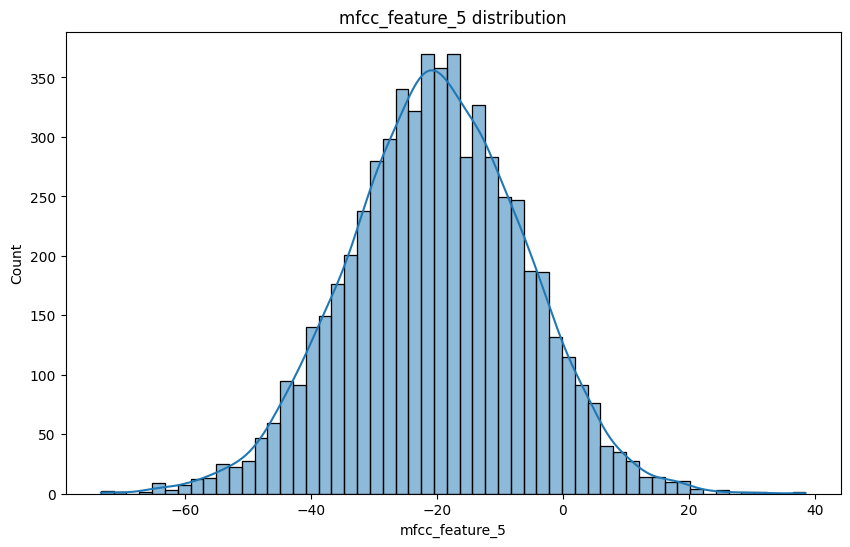

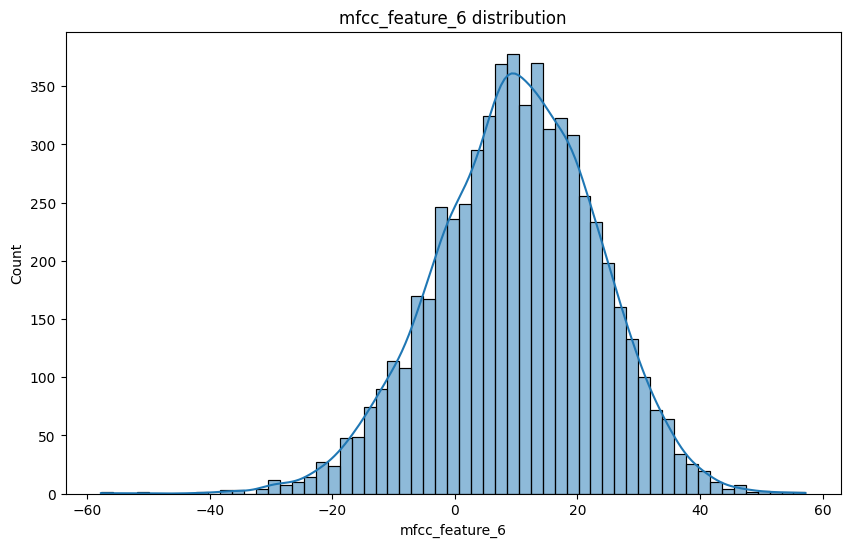

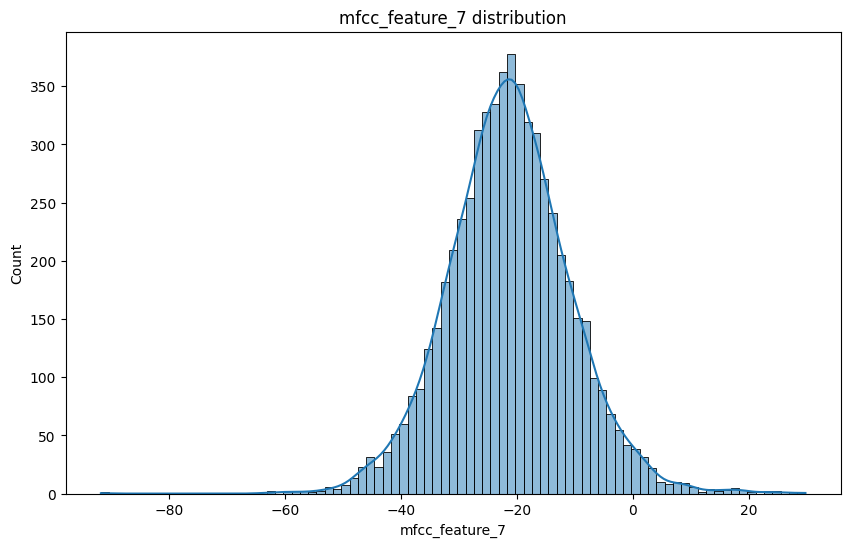

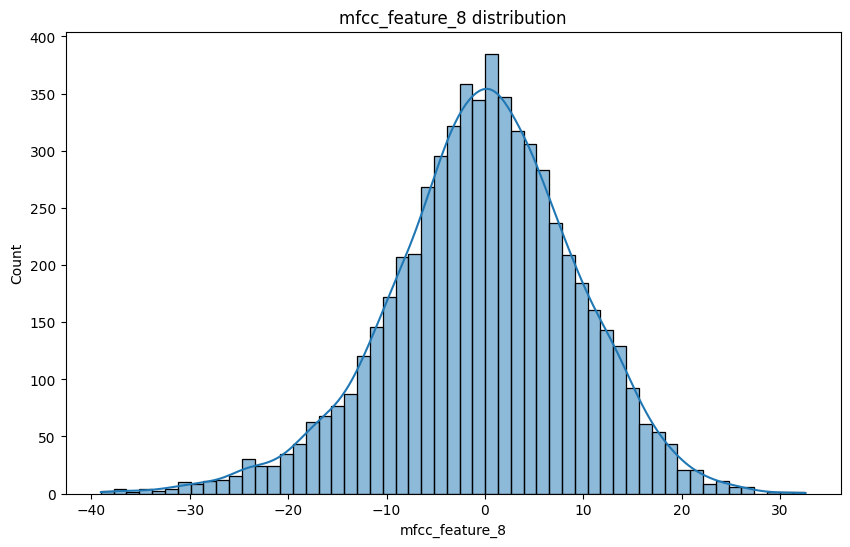

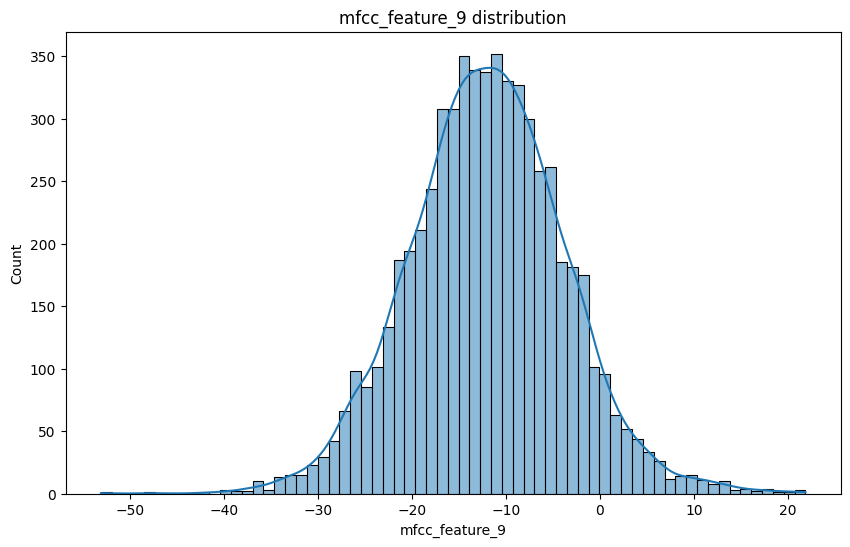

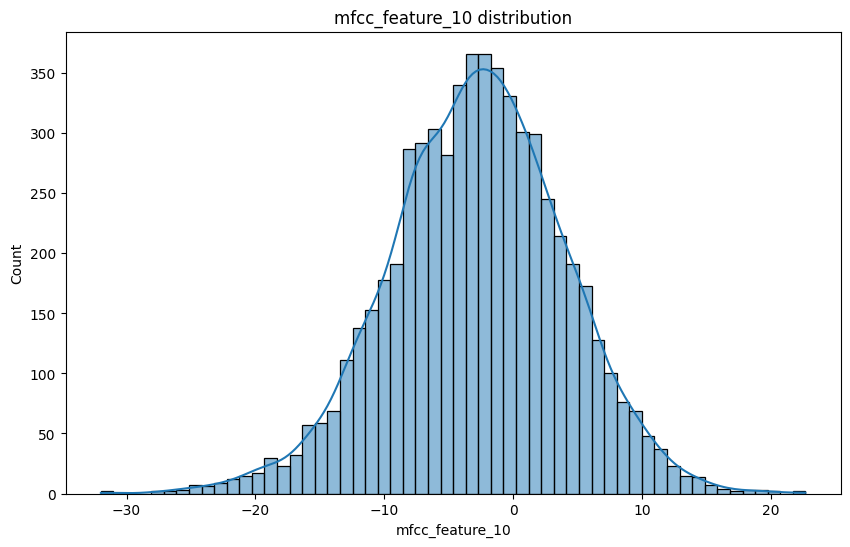

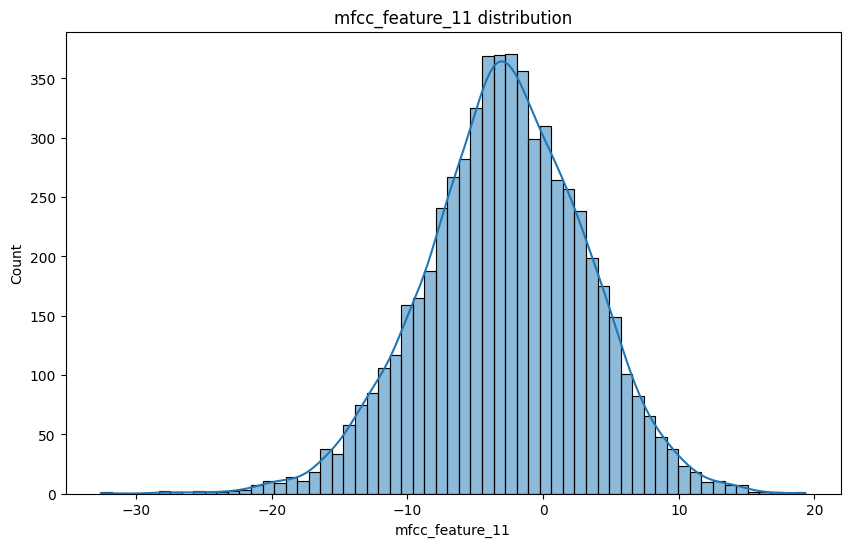

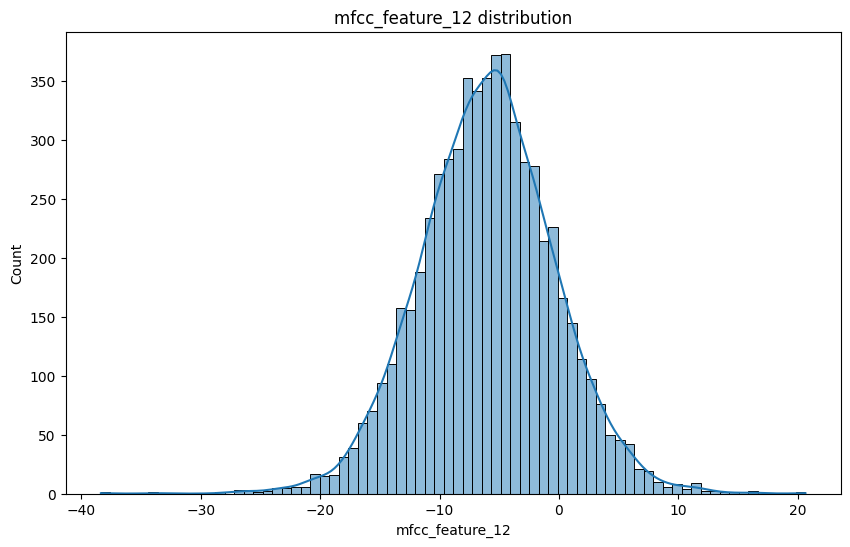

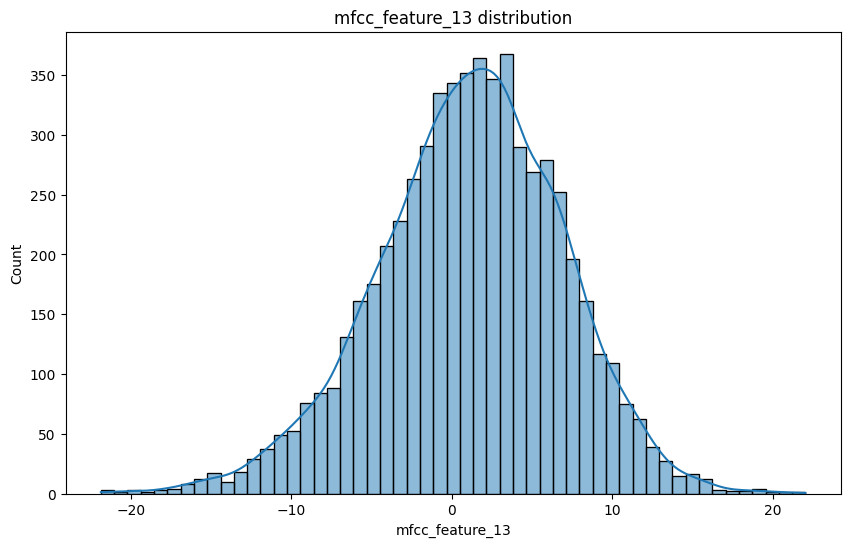

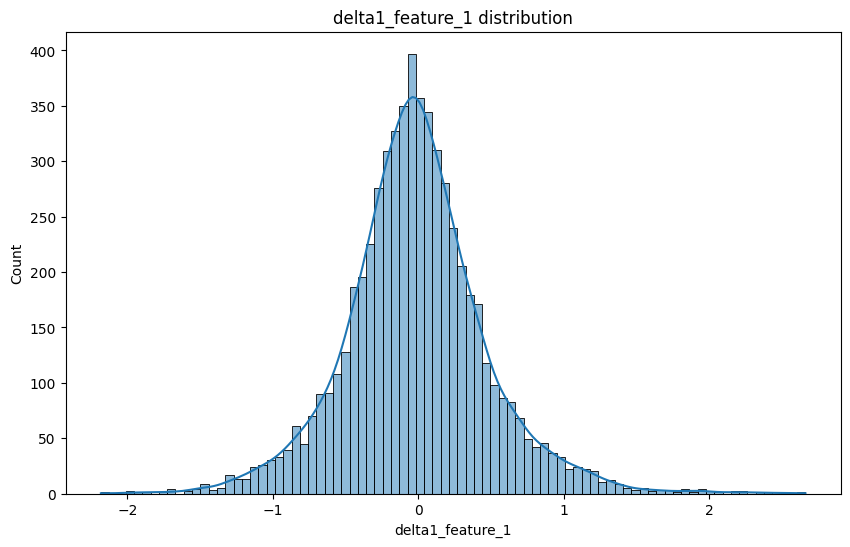

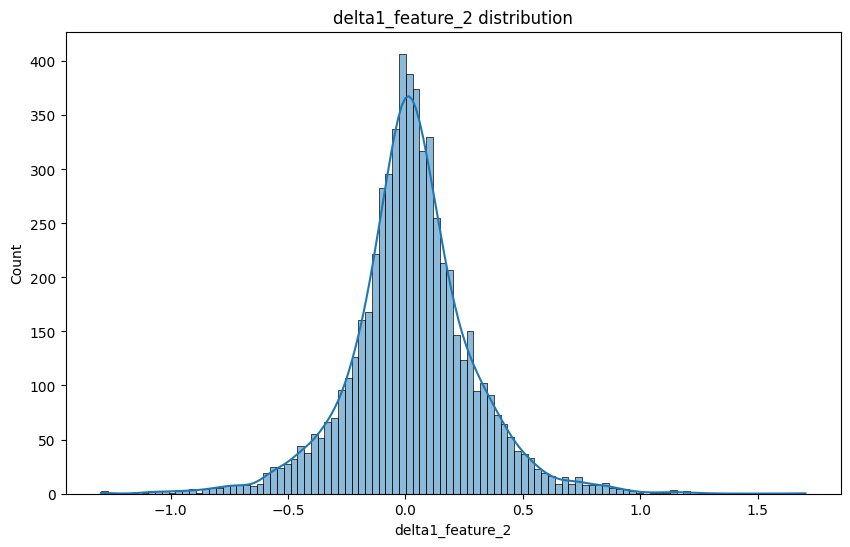

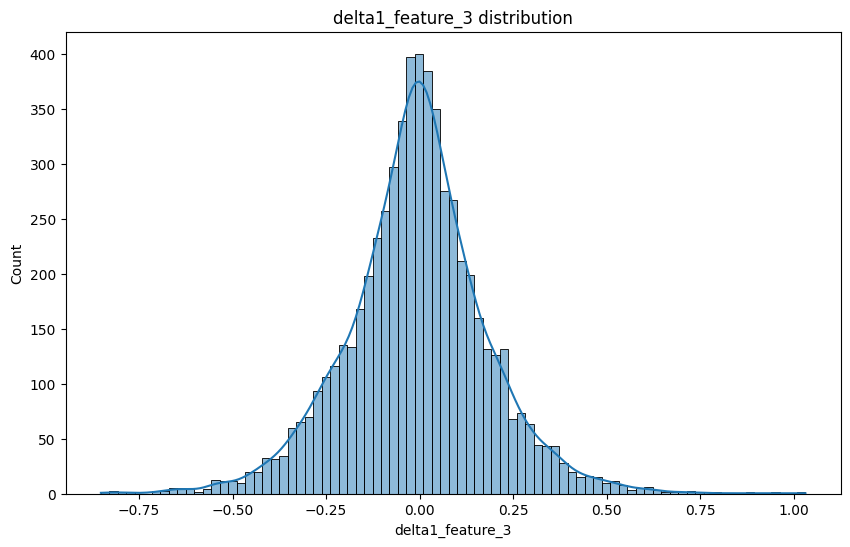

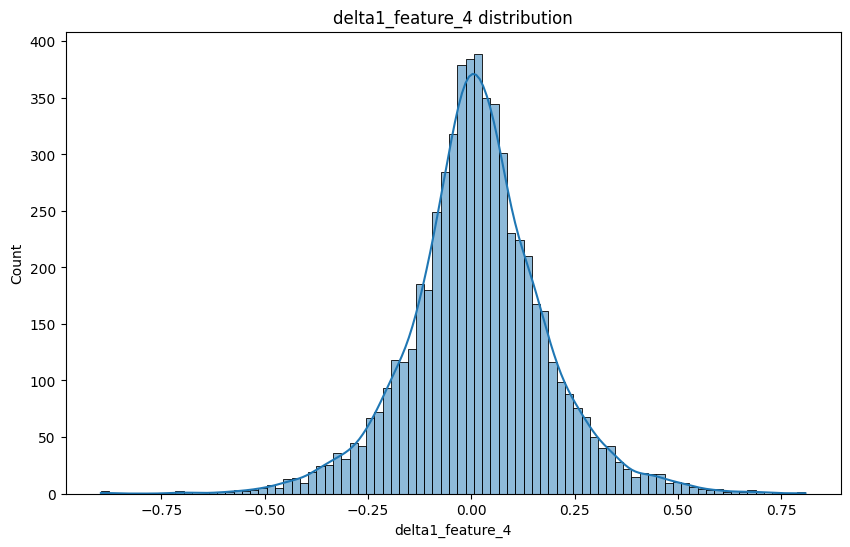

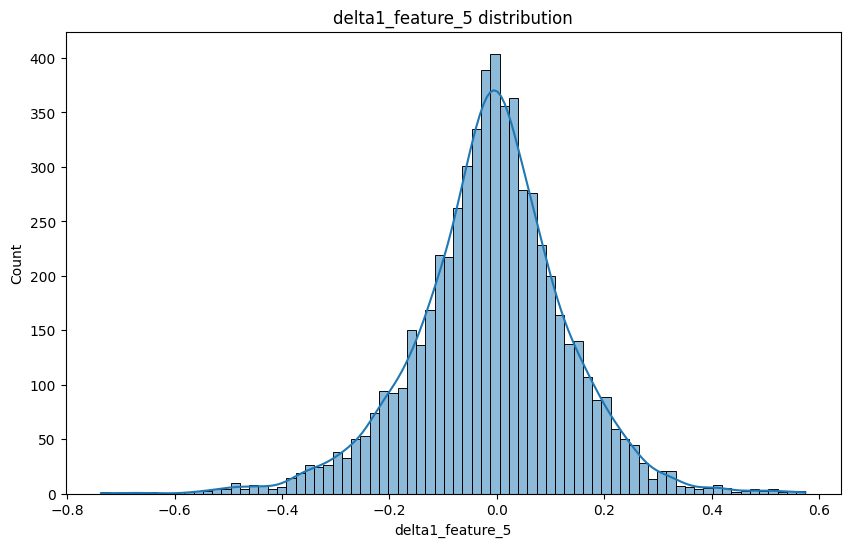

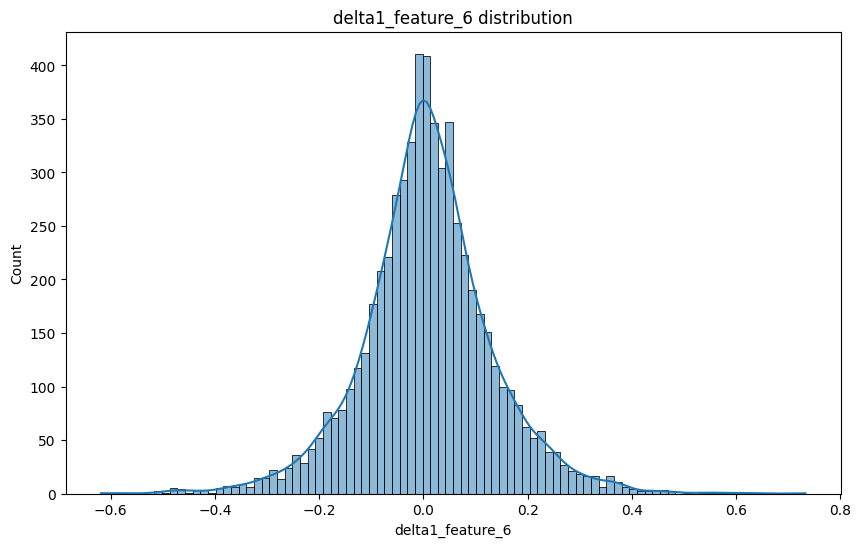

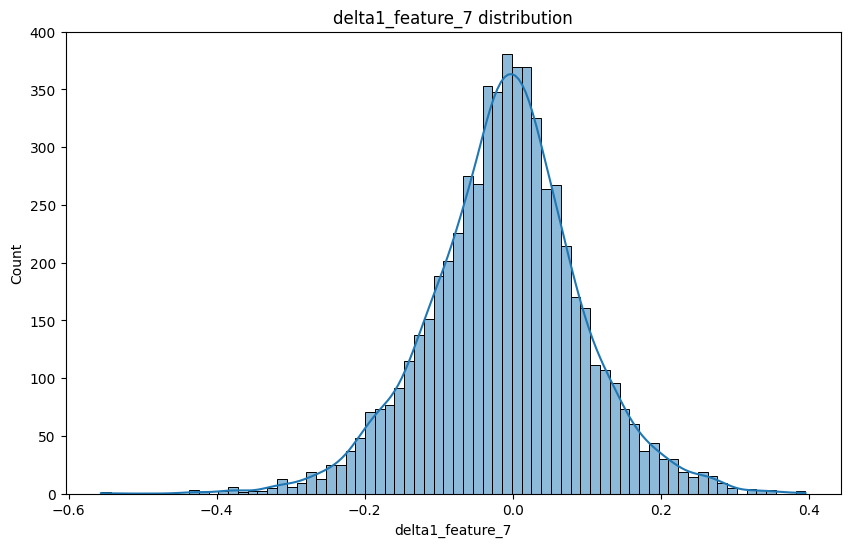

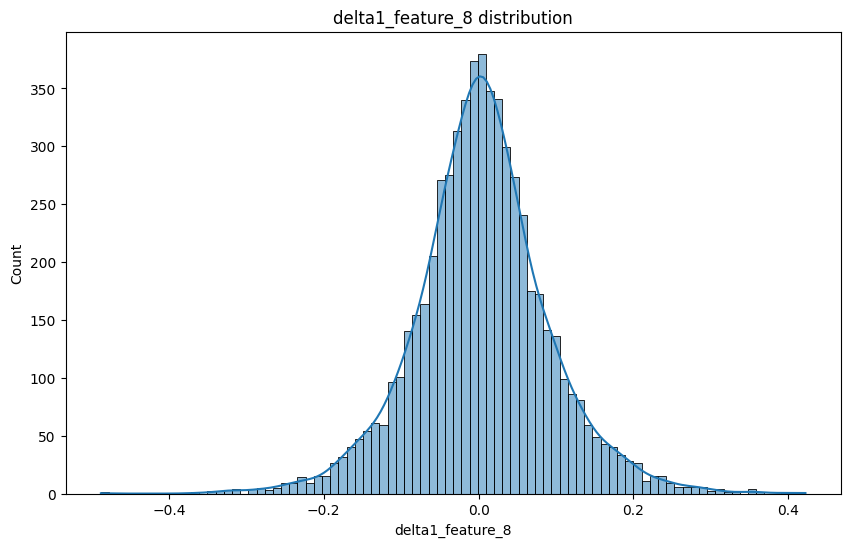

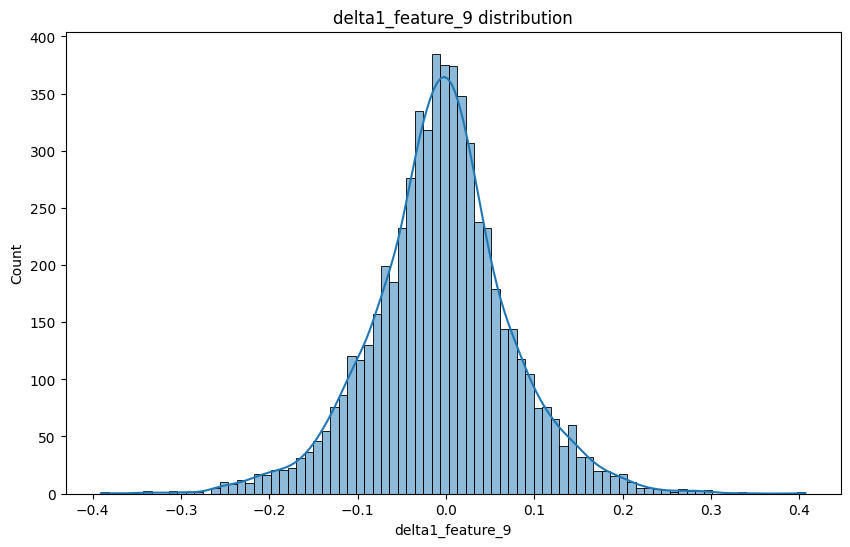

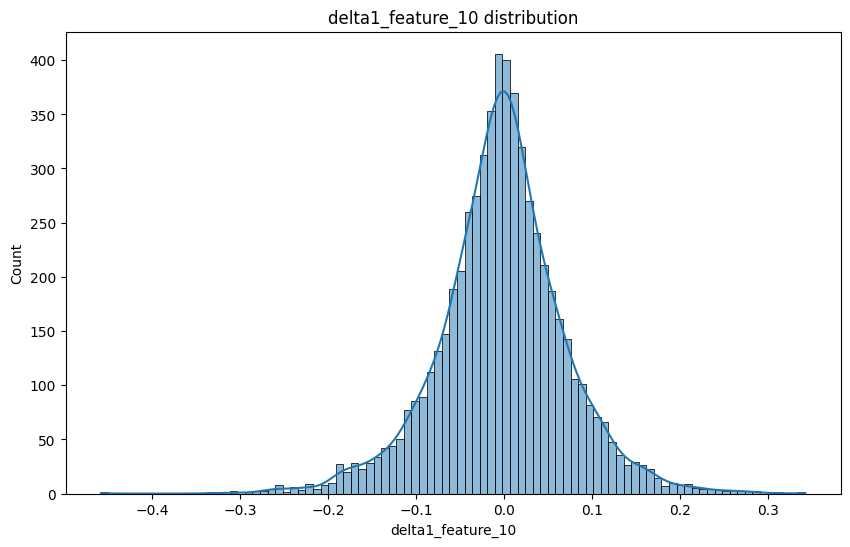

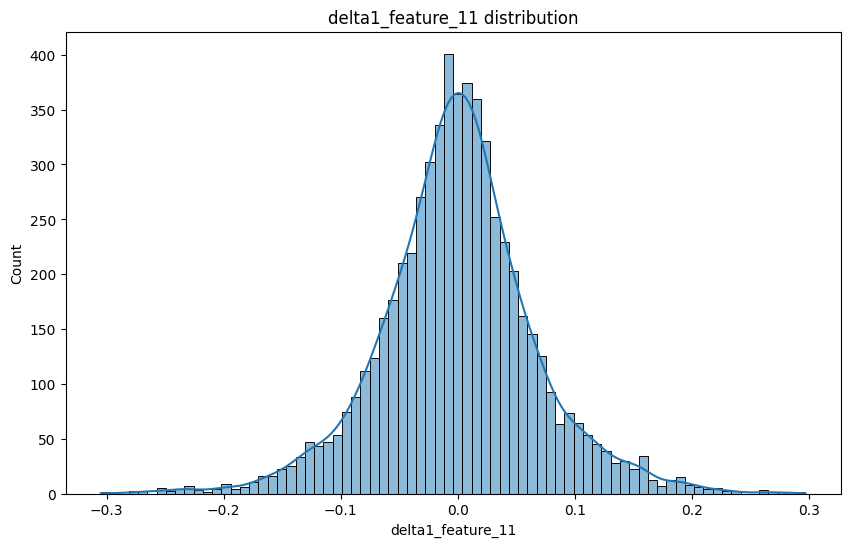

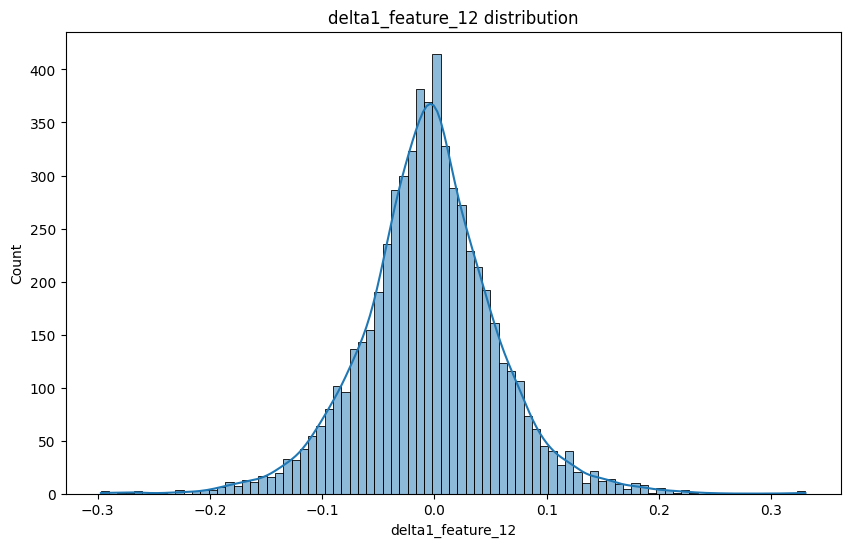

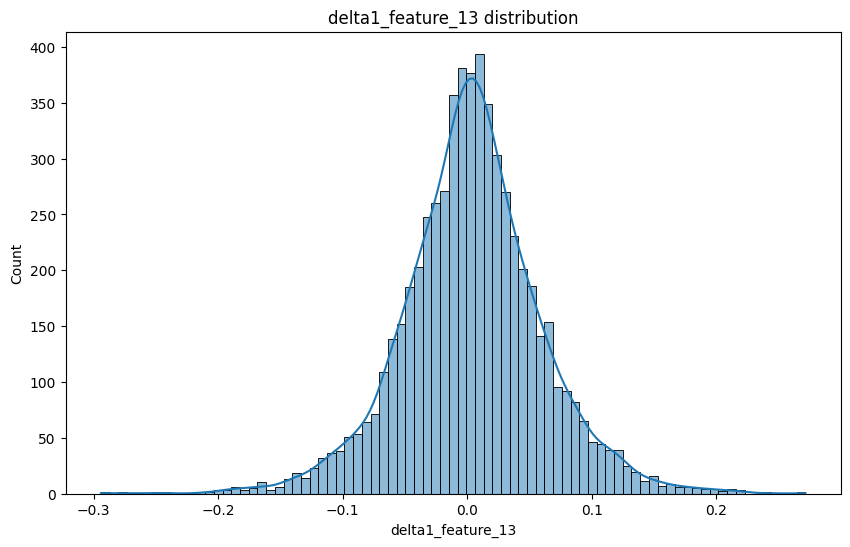

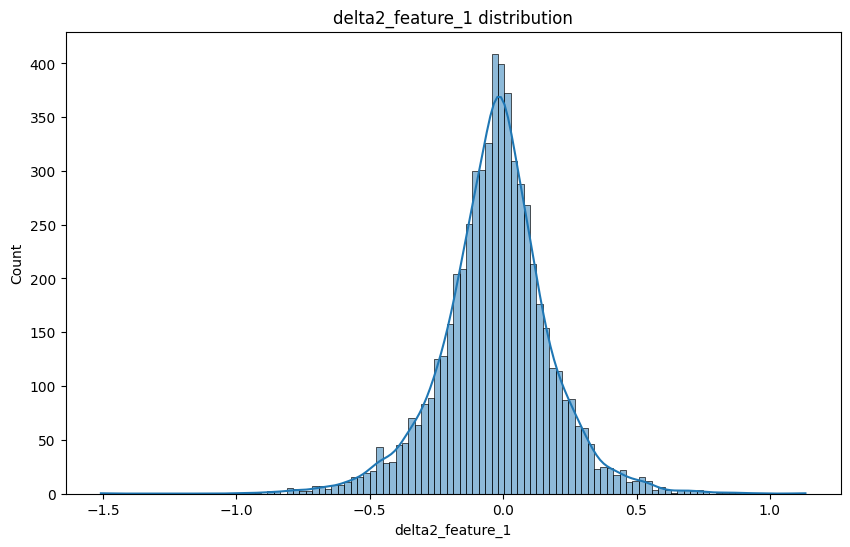

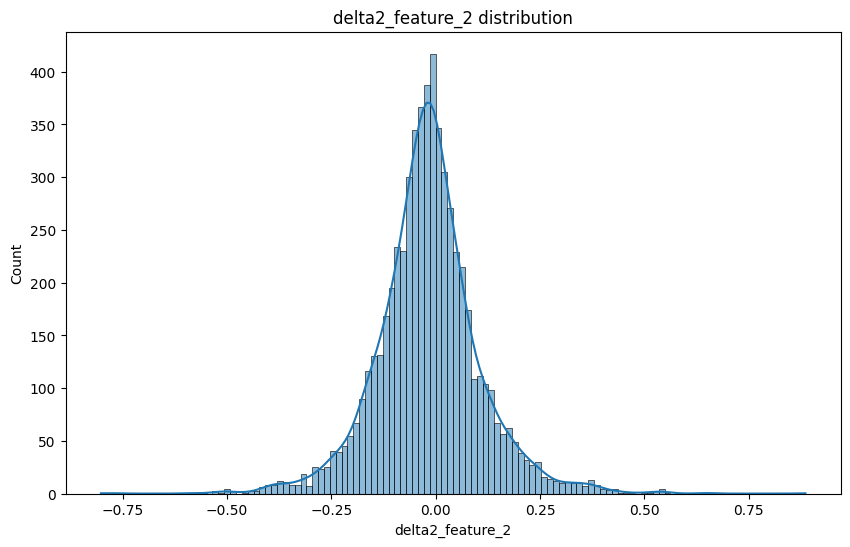

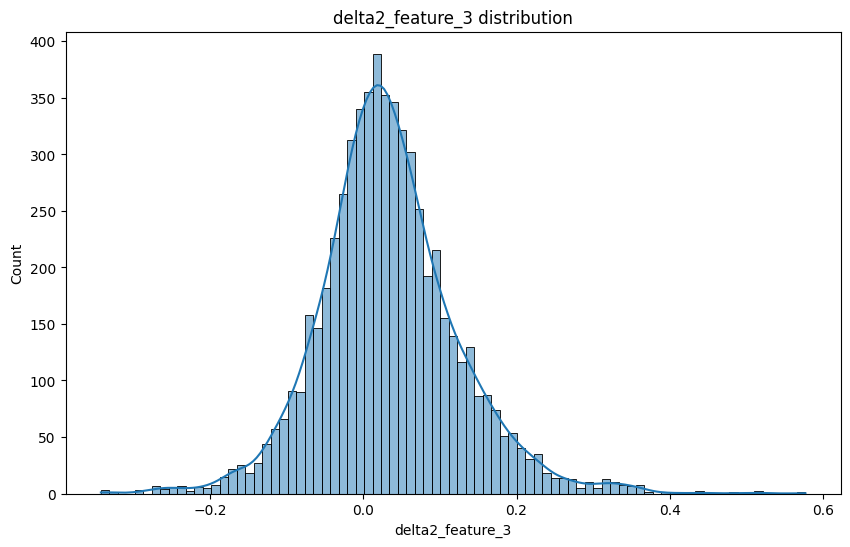

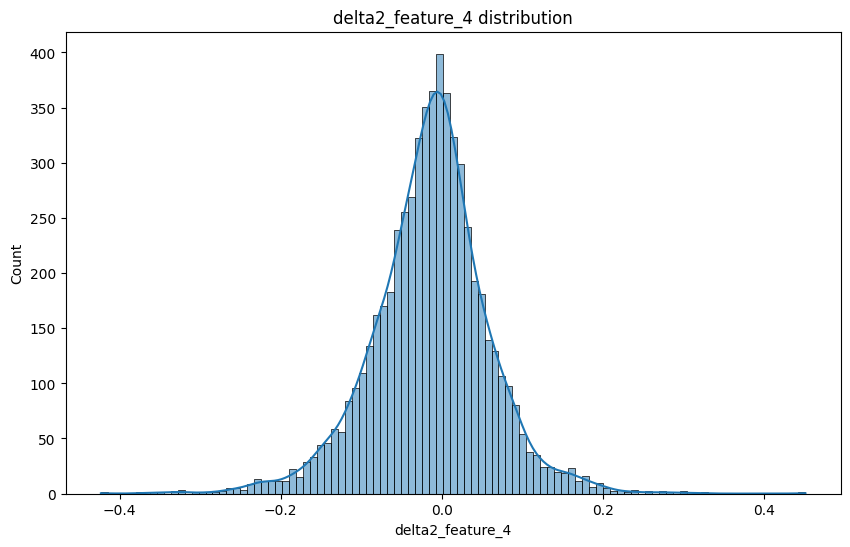

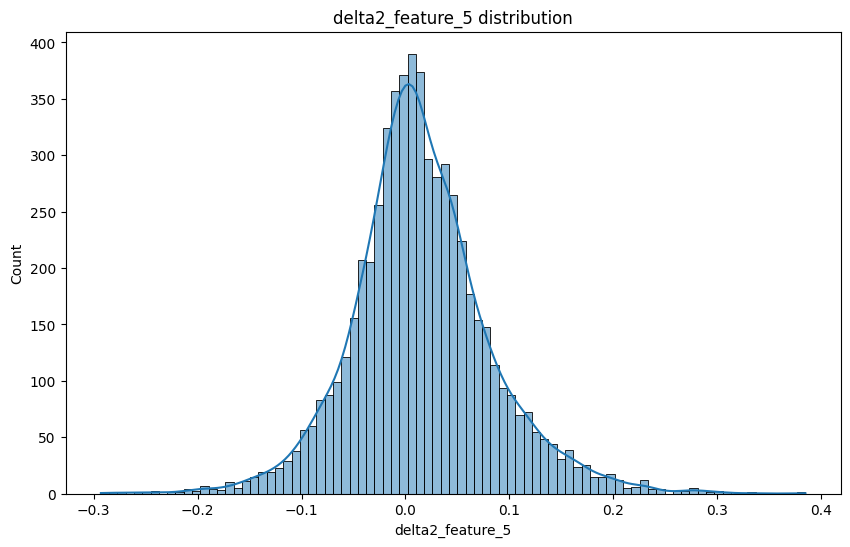

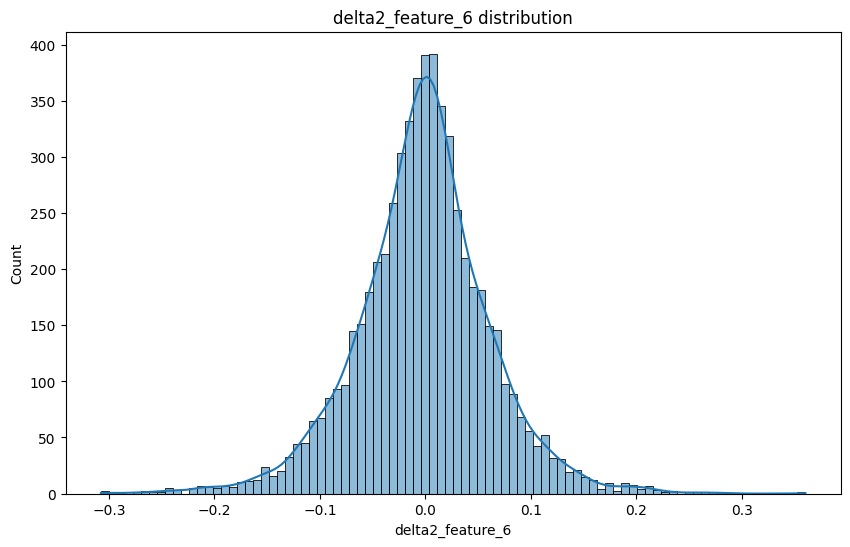

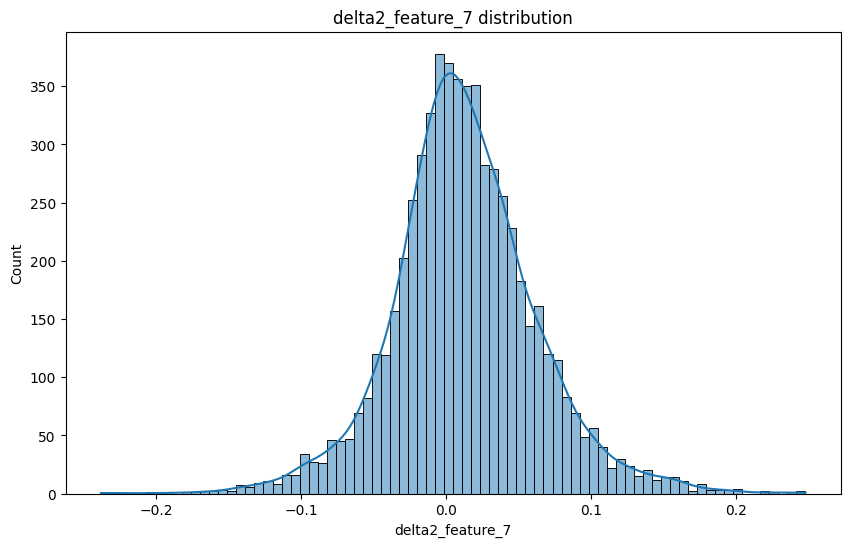

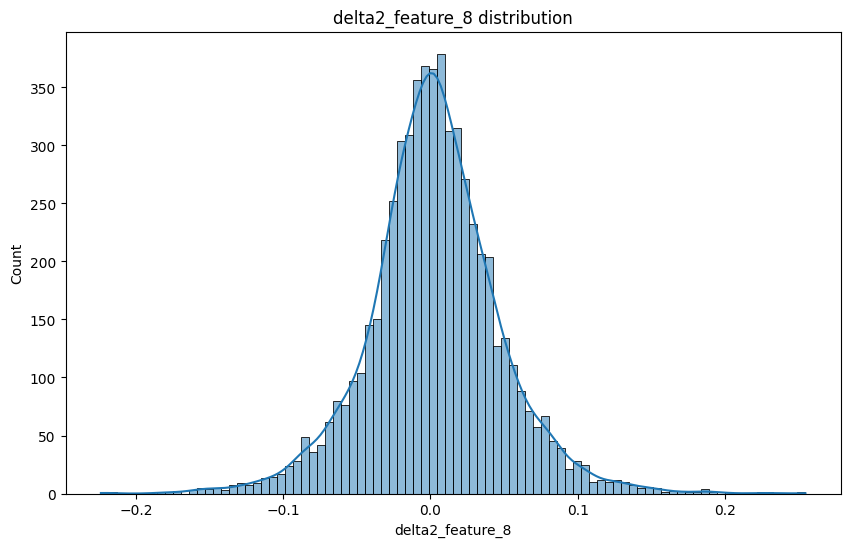

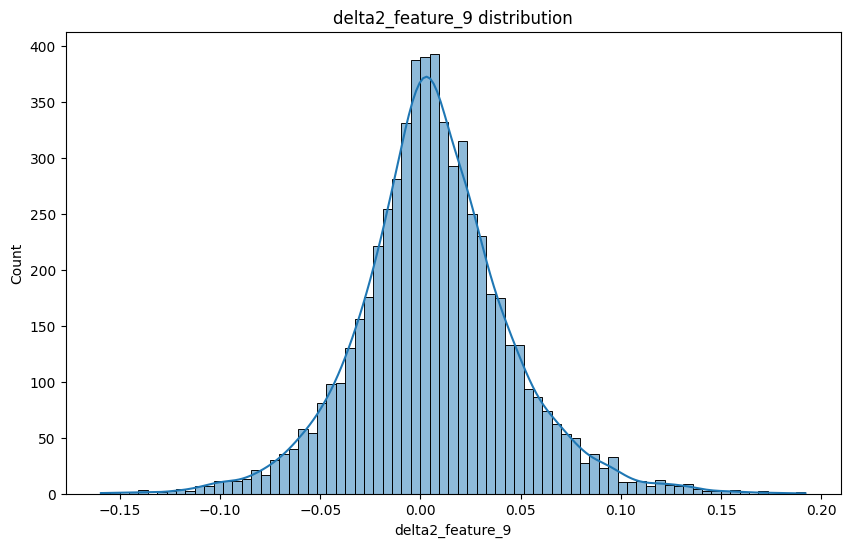

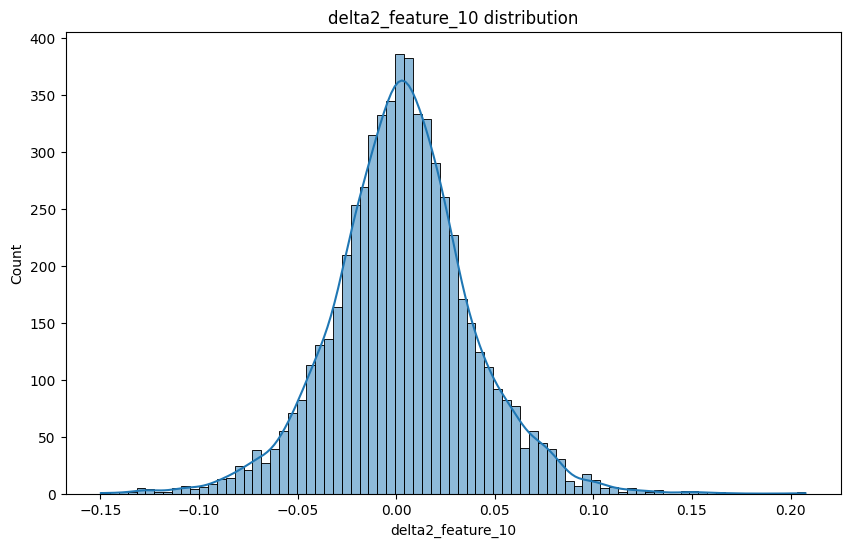

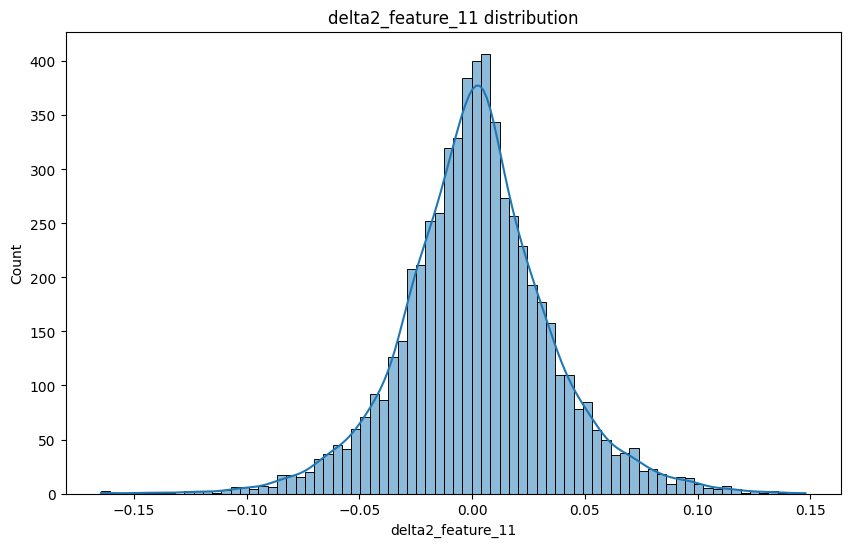

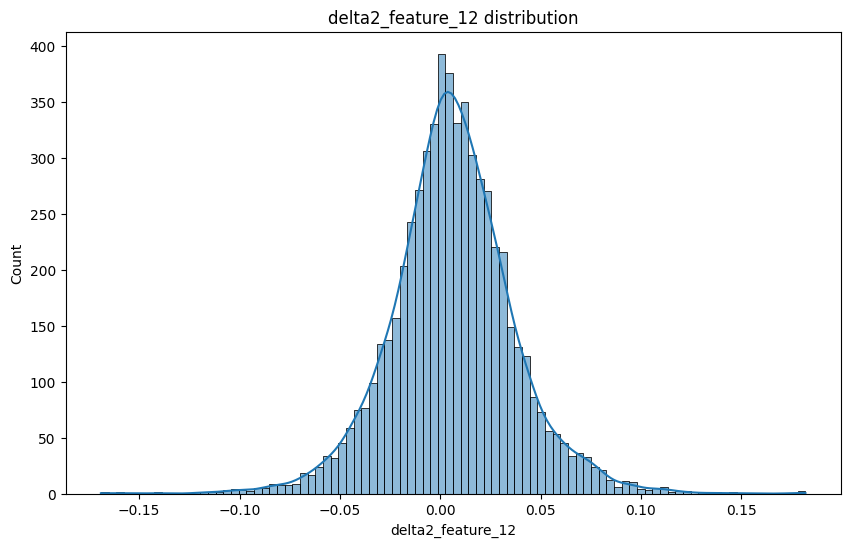

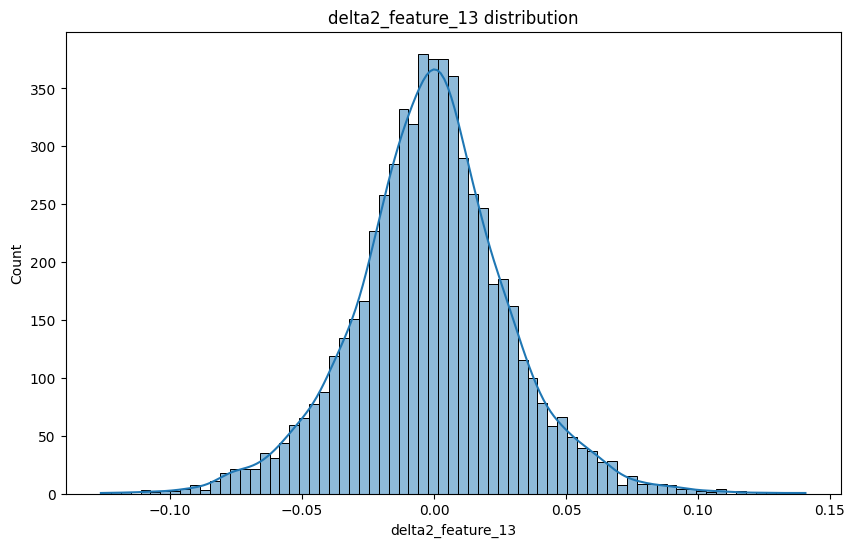

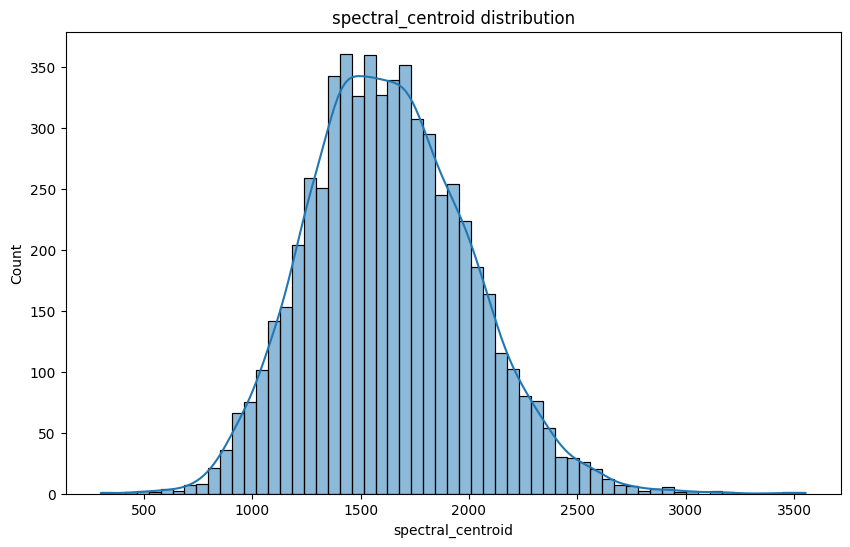

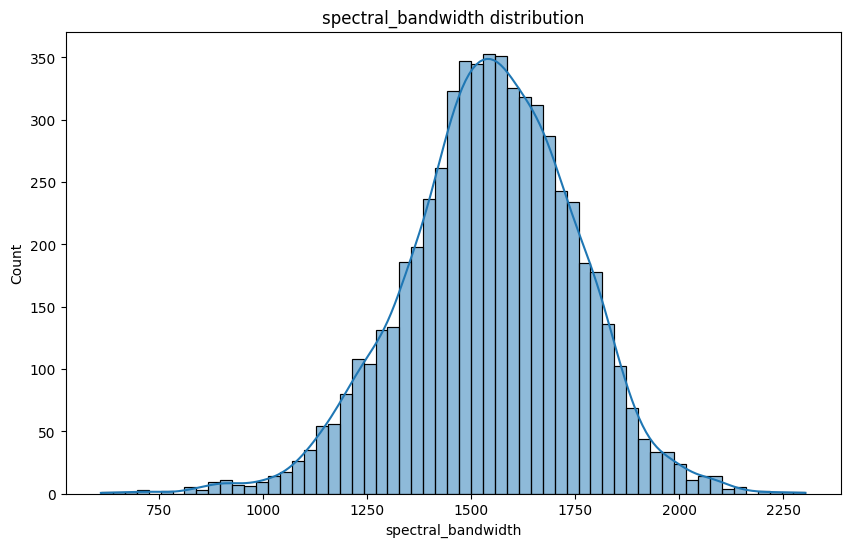

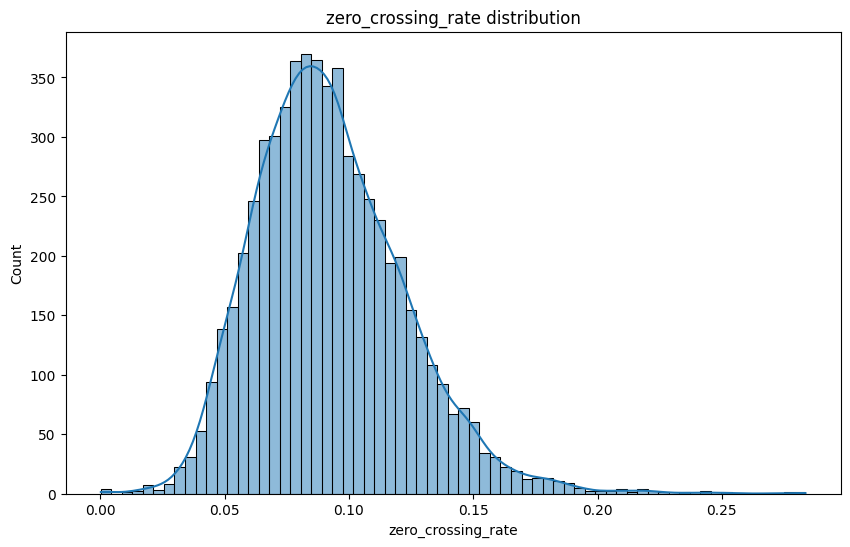

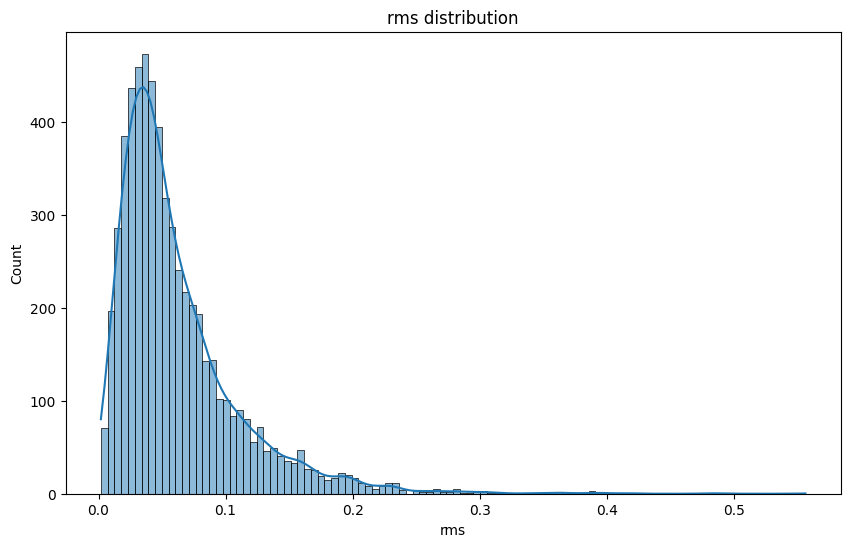

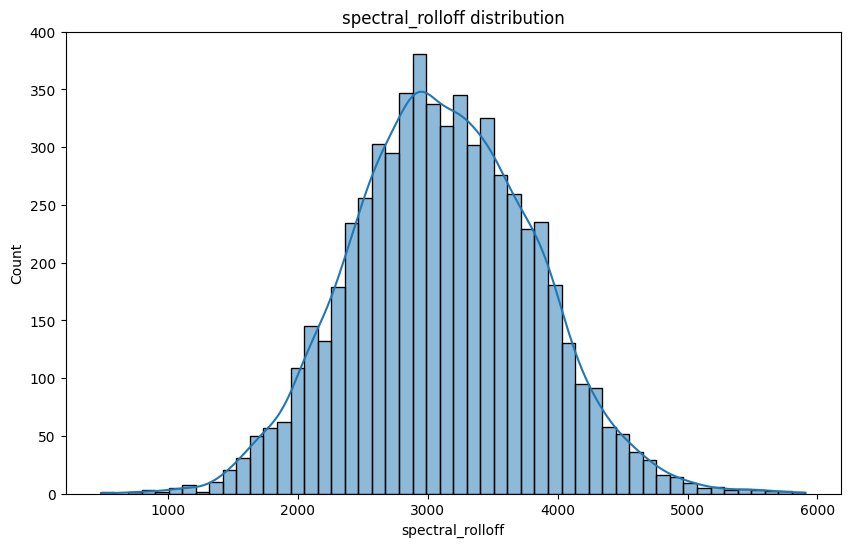

In [25]:
showFeatureDistribution(data)

Distribution curves look great, let's verify if there is no constant values

In [26]:
def showConstantValues(dataset):
    for feature in dataset.columns[1:]:
        if dataset[feature].nunique() == 1:
            print(f'{feature} is constant')

In [27]:
showConstantValues(data)

We have 0 constant values. Any NaN ?

In [28]:
print(any(data.isnull().sum()))

False


# Model exploration

In [29]:
#imports for the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

In [30]:
#shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [31]:
# Transform gender column: Male -> 0, Female -> 1
data['gender'] = data['gender'].map({'m': 0, 'f': 1})

In [32]:
# Split the datasets into features and target
y = data['gender']
X = data.drop(columns="gender") 

In [34]:
# Split the datasets into training, validation and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_val.shape, X_test.shape

((3835, 44), (959, 44), (1199, 44))

Now lets have a quick overview of how differents models defend themselves with the smaller dataset : averageDataset with only 13 features.

In [36]:
pip = make_pipeline(StandardScaler(), LogisticRegression())
start = time()
pip.fit(X_train, y_train)
end = time()
print(f'Accuracy (LogisticRegression): {round(pip.score(X_test, y_test)*100,3)}% in {round(end-start,3)}s')

knn = KNeighborsClassifier()
start = time()
knn.fit(X_train, y_train)
end = time()
print(f'Accuracy (KNeighborsClassifier): {round(knn.score(X_test, y_test)*100,3)}% in {round(end-start,3)}s')

#Classification svr
svc = SVC()
start = time()
svc.fit(X_train, y_train)
end = time()
print(f'Accuracy (SVC): {round(svc.score(X_test, y_test)*100,3)}% in {round(end-start,3)}s')

rf = RandomForestClassifier()
start = time()
rf.fit(X_train, y_train)
end = time()
print(f'Accuracy (RandomForestClassifier): {round(rf.score(X_test, y_test)*100,3)}% in {round(end-start,3)}s')

gb = GradientBoostingClassifier()
start = time()
gb.fit(X_train, y_train)
end = time()
print(f'Accuracy (GradientBoostingClassifier): {round(gb.score(X_test, y_test)*100,3)}% in {round(end-start,3)}s')

Accuracy (LogisticRegression): 81.068% in 0.093s
Accuracy (KNeighborsClassifier): 61.051% in 0.004s
Accuracy (SVC): 63.386% in 0.443s
Accuracy (RandomForestClassifier): 80.4% in 1.285s
Accuracy (GradientBoostingClassifier): 80.484% in 3.726s


Let's 